In [89]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy

from pylab import *

# Enable inline plotting
%matplotlib inline

In [199]:
cdf = pd.read_csv(r'commDelays2.csv')

In [200]:
cdf.head(5)

,run,type,module,name,attrname,attrvalue,value
0,JoinScenarioSimpleAI-9-20181001-09:33:05-2615,runattr,NaN,NaN,configname,JoinScenarioSimpleAI,NaN
1,JoinScenarioSimpleAI-9-20181001-09:33:05-2615,runattr,NaN,NaN,datetime,20181001-09:33:05,NaN
2,JoinScenarioSimpleAI-9-20181001-09:33:05-2615,runattr,NaN,NaN,experiment,JoinScenarioSimpleAI,NaN
3,JoinScenarioSimpleAI-9-20181001-09:33:05-2615,runattr,NaN,NaN,inifile,omnetpp.ini,NaN
4,JoinScenarioSimpleAI-9-20181001-09:33:05-2615,runattr,NaN,NaN,iterationvars,"$rule=""Plurality"", $situation=""Unstable"", $nCa...",NaN


In [201]:
timeToConsensus = cdf[cdf["name"] == '#timeToConsensus']
timeToConsensus.head()

,run,type,module,name,attrname,attrvalue,value
114412,JoinScenarioSimpleAI-43-20180929-18:28:46-16346,scalar,JoinNetworkAI.ljmanager,#timeToConsensus,NaN,NaN,125.820894
114423,JoinScenarioSimpleAI-48-20181001-09:07:10-388,scalar,JoinNetworkAI.ljmanager,#timeToConsensus,NaN,NaN,100.243645
114430,JoinScenarioSimpleAI-52-20180929-17:14:58-8372,scalar,JoinNetworkAI.ljmanager,#timeToConsensus,NaN,NaN,154.105767
114437,JoinScenarioSimpleAI-68-20180929-18:18:28-14962,scalar,JoinNetworkAI.ljmanager,#timeToConsensus,NaN,NaN,132.223406
114452,JoinScenarioSimpleAI-60-20180929-17:54:06-12500,scalar,JoinNetworkAI.ljmanager,#timeToConsensus,NaN,NaN,702.313376


In [202]:
timeToConsensus.value.describe()

count     800.000000
mean      205.383870
std       247.289354
min        -1.000000
25%        99.448995
50%       133.402941
75%       170.121529
max      1649.276982
Name: value, dtype: float64

In [203]:
test = cdf[(cdf.name=='#timeToConsensus') | (cdf.attrname=='platoonSize') ]
test = test.assign(qname = test.attrname.combine_first(test.module + '.' + test.name))
test.value = test.value.combine_first(test.attrvalue.astype('float64'))
test[['run','name','attrname','value','attrvalue', 'qname']]

,run,name,attrname,value,attrvalue,qname
17,JoinScenarioSimpleAI-9-20181001-09:33:05-2615,NaN,platoonSize,4.000000,4,platoonSize
122,JoinScenarioSimpleAI-15-20181001-09:33:31-2663,NaN,platoonSize,4.000000,4,platoonSize
227,JoinScenarioSimpleAI-10-20181001-09:33:09-2623,NaN,platoonSize,4.000000,4,platoonSize
332,JoinScenarioSimpleAI-0-20181001-09:32:24-2358,NaN,platoonSize,4.000000,4,platoonSize
437,JoinScenarioSimpleAI-14-20181001-09:33:26-2655,NaN,platoonSize,4.000000,4,platoonSize
542,JoinScenarioSimpleAI-19-20181001-09:33:49-2697,NaN,platoonSize,4.000000,4,platoonSize
647,JoinScenarioSimpleAI-18-20181001-09:33:44-2689,NaN,platoonSize,4.000000,4,platoonSize
752,JoinScenarioSimpleAI-8-20181001-09:31:28-2141,NaN,platoonSize,4.000000,4,platoonSize
857,JoinScenarioSimpleAI-0-20181001-09:30:52-2067,NaN,platoonSize,4.000000,4,platoonSize
962,JoinScenarioSimpleAI-1-20181001-09:30:57-2084,NaN,platoonSize,4.000000,4,platoonSize


In [204]:
test_wide = test.pivot('run', columns='qname', values='value')
test_wide.head(20)

qname,JoinNetworkAI.ljmanager.#timeToConsensus,platoonSize
run,,
JoinScenarioSimpleAI-0-20180929-17:35:20-10533,170.244963,5.0
JoinScenarioSimpleAI-0-20180929-17:47:52-11771,178.091115,5.0
JoinScenarioSimpleAI-0-20180929-17:59:55-12930,180.242507,5.0
JoinScenarioSimpleAI-0-20181001-09:17:22-1060,250.246109,4.0
JoinScenarioSimpleAI-0-20181001-09:30:52-2067,69.679511,4.0
JoinScenarioSimpleAI-0-20181001-09:32:24-2358,260.233830,4.0
JoinScenarioSimpleAI-1-20180929-17:35:26-10552,156.751949,5.0
JoinScenarioSimpleAI-1-20180929-17:47:58-11780,101.129436,5.0
JoinScenarioSimpleAI-1-20180929-18:00:01-12958,141.331617,5.0


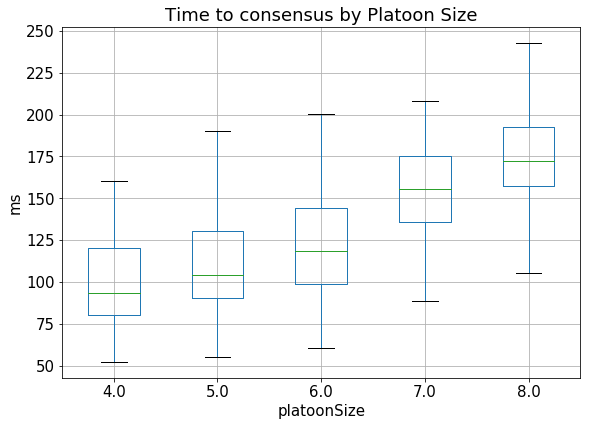

In [306]:
# set the default image resolution and size
#plt.rcParams['figure.figsize'] = [8.0, 5.0]
#plt.rcParams['figure.dpi'] = 144
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
plt.tight_layout()
# create a scatter plot
#test_wide.plot.scatter('platoonSize', 'JoinNetworkAI.ljmanager.#timeToConsensus')
#plt.show()
#test_wide.plot.boxplot('platoonSize', 'JoinNetworkAI.ljmanager.#timeToConsensus')
box = test_wide.boxplot(ax=ax, column=['JoinNetworkAI.ljmanager.#timeToConsensus'], by='platoonSize', showfliers=False)
plt.suptitle('')
plt.title('Time to consensus by Platoon Size')
#plt.show()
plt.savefig('TimeToConsensus.png',bbox_inches="tight")

In [207]:
memberDelay = cdf[(cdf.name=='#highestDelayToMember') | (cdf.attrname=='platoonSize')]
memberDelay = memberDelay.assign(qname = memberDelay.attrname.combine_first(memberDelay.module + '.' + memberDelay.name))
memberDelay.value = memberDelay.value.combine_first(memberDelay.attrvalue.astype('float64'))

memberDelay = memberDelay.pivot('run', columns='qname', values='value')
memberDelay.head(20)

qname,JoinNetworkAI.ljmanager.#highestDelayToMember,platoonSize
run,,
JoinScenarioSimpleAI-0-20180929-17:35:20-10533,10.032196,5.0
JoinScenarioSimpleAI-0-20180929-17:47:52-11771,6.051391,5.0
JoinScenarioSimpleAI-0-20180929-17:59:55-12930,0.239417,5.0
JoinScenarioSimpleAI-0-20181001-09:17:22-1060,0.240037,4.0
JoinScenarioSimpleAI-0-20181001-09:30:52-2067,0.925163,4.0
JoinScenarioSimpleAI-0-20181001-09:32:24-2358,0.245834,4.0
JoinScenarioSimpleAI-1-20180929-17:35:26-10552,4.511483,5.0
JoinScenarioSimpleAI-1-20180929-17:47:58-11780,6.696708,5.0
JoinScenarioSimpleAI-1-20180929-18:00:01-12958,5.689675,5.0


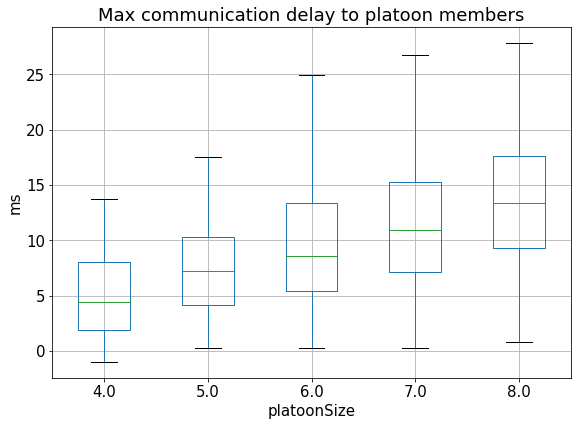

In [307]:
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')

box = memberDelay.boxplot(ax=ax, column=['JoinNetworkAI.ljmanager.#highestDelayToMember'], by='platoonSize', showfliers=False)
plt.suptitle('')
plt.title('Max communication delay to platoon members')
#plt.show()
plt.savefig('HighestMemberDelay.png',bbox_inches="tight")

In [71]:
udf = pd.read_csv(r'averageUtils.csv')

udf_pivot = udf[udf.Scenario == "Stable"].pivot_table(index='Size', columns='Rule', values='Average')

udf_pivot.head(10)

Rule,Approval,Borda,Copeland,Plurality
Size,,,,
4,-0.054875,-0.000262,-0.000535,-0.033152
5,-0.047225,0.002283,-0.003722,-0.014049
6,-0.046100,0.000420,-0.001624,-0.026063
7,-0.044171,-0.001165,-0.001674,-0.023657
8,-0.020056,-0.002515,-0.000027,-0.038437


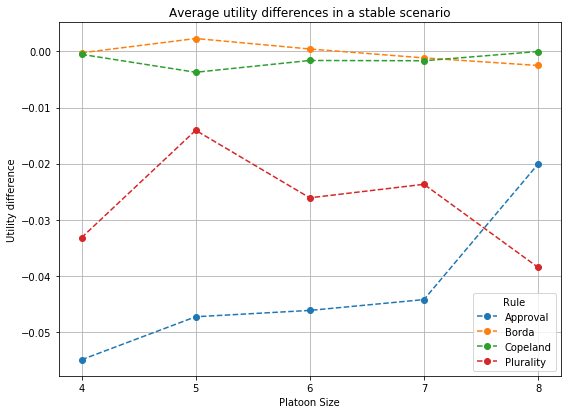

In [198]:
udf_pivot = udf[udf.Scenario == "Stable"].pivot_table(index='Size', columns='Rule', values='Average')

fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_xticks(numpy.arange(0, 10, 1))
udf_pivot.plot.line(ax=ax,linestyle='--', marker='o')
#udf.plot.scatter(ax=ax, y='Average', x='Size')
plt.grid()
plt.title("Average utility differences in a stable scenario")
plt.ylabel('Utility difference')
plt.xlabel('Platoon Size')
plt.show()
#plt.savefig('StableUtilityDiff.png')

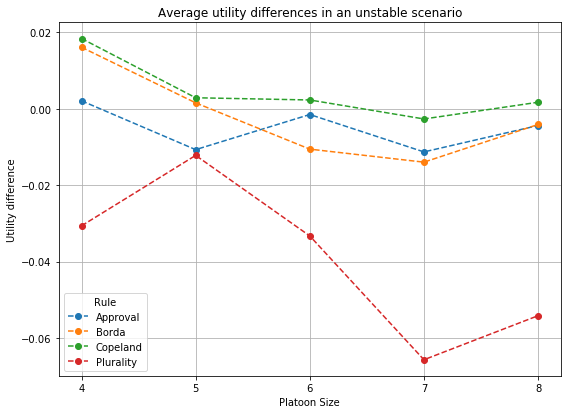

In [109]:
udf_pivot_u = udf[udf.Scenario == "Unstable"].pivot_table(index='Size', columns='Rule', values='Average')

fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_xticks(numpy.arange(0, 10, 1))
udf_pivot_u.plot.line(ax=ax,linestyle='--', marker='o')

plt.grid()
plt.title("Average utility differences in an unstable scenario")
plt.ylabel('Utility difference')
plt.xlabel('Platoon Size')
plt.savefig('UnstableUtilityDiff.png')

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


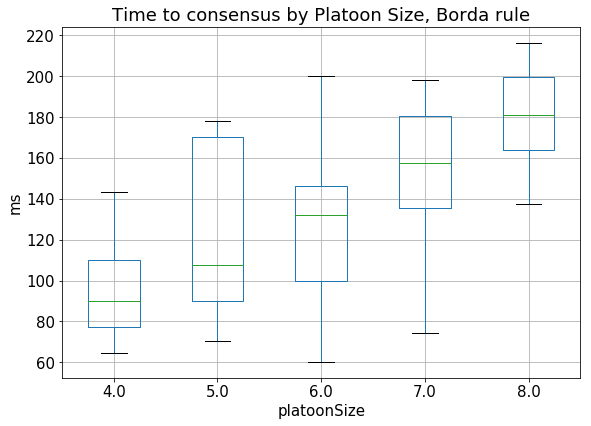

In [308]:
itervars_df = cdf.loc[cdf.type=='itervar', ['run', 'attrname', 'attrvalue']]

#itervars_df[cdf.attrname=='rule'].head()

itervarspivot_df = itervars_df[cdf.attrname=='rule'].pivot(index='run', columns='attrname', values='attrvalue')
#itervarspivot_df.head()

ruleTimeToConsensus = test_wide.merge(itervarspivot_df, left_on='run', right_index=True, how='outer')
#ruleTimeToConsensus[ruleTimeToConsensus.rule.str.contains('Borda')].head()


fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')

box = ruleTimeToConsensus[ruleTimeToConsensus.rule.str.contains('Borda')].boxplot(ax=ax, column=['JoinNetworkAI.ljmanager.#timeToConsensus'], by='platoonSize', showfliers=False)
plt.suptitle('')
plt.title('Time to consensus by Platoon Size, Borda rule')
plt.savefig('TimeToConsensusBorda.png',bbox_inches="tight")

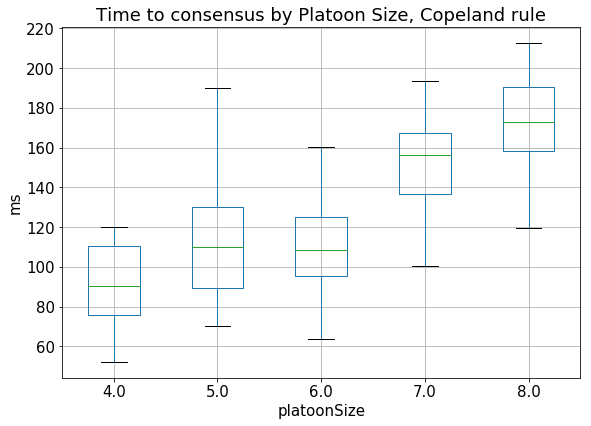

In [309]:
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')

box = ruleTimeToConsensus[ruleTimeToConsensus.rule.str.contains('Copeland')].boxplot(ax=ax, column=['JoinNetworkAI.ljmanager.#timeToConsensus'], by='platoonSize', showfliers=False)
plt.suptitle('')
plt.title('Time to consensus by Platoon Size, Copeland rule')
plt.savefig('TimeToConsensusCopeland.png',bbox_inches="tight")

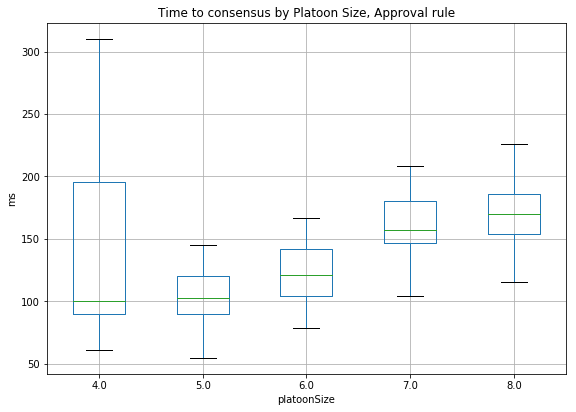

In [213]:
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')

box = ruleTimeToConsensus[ruleTimeToConsensus.rule.str.contains('Approval')].boxplot(ax=ax, column=['JoinNetworkAI.ljmanager.#timeToConsensus'], by='platoonSize', showfliers=False)
plt.suptitle('')
plt.title('Time to consensus by Platoon Size, Approval rule')
plt.savefig('TimeToConsensusApproval.png')

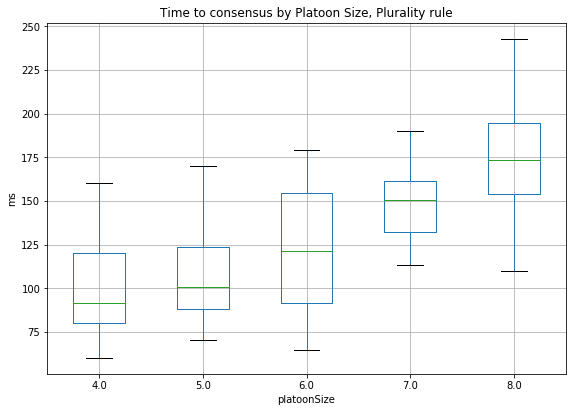

In [212]:
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')

box = ruleTimeToConsensus[ruleTimeToConsensus.rule.str.contains('Plurality')].boxplot(ax=ax, column=['JoinNetworkAI.ljmanager.#timeToConsensus'], by='platoonSize', showfliers=False)
plt.suptitle('')
plt.title('Time to consensus by Platoon Size, Plurality rule')
plt.savefig('TimeToConsensusPlurality.png')

In [164]:
adf = pd.read_csv(r'abandonRates.csv')

adf_pivot = adf[udf.Scenario == "Stable"].pivot_table(index='Size', columns='Rule', values='Exits')


adf_pivot.head(10)

Rule,Approval,Borda,Copeland,Plurality
Size,,,,
4,0.0,0.0,0.0,5.000000
5,0.0,0.0,0.0,2.000000
6,0.0,0.0,0.0,1.666667
7,0.0,0.0,0.0,2.857143
8,0.0,0.0,0.0,6.250000


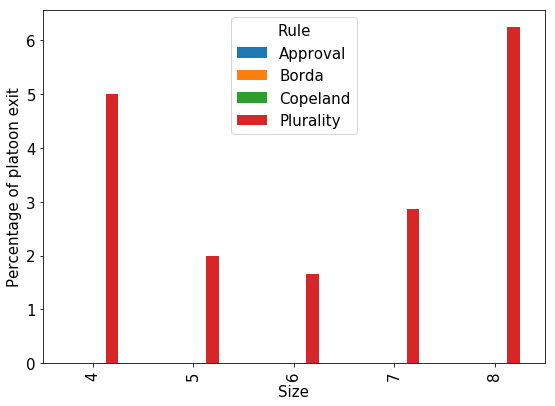

In [313]:
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('Percentage of platoon exit')
adf_pivot.plot.bar(ax=ax)
plt.savefig('ExitPercentageStable.png',bbox_inches="tight")

In [314]:
adf_pivot_u = adf[udf.Scenario == "Unstable"].pivot_table(index='Size', columns='Rule', values='Exits')


adf_pivot_u.head(10)

Rule,Approval,Borda,Copeland,Plurality
Size,,,,
4,0.0,1.250000,1.250000,11.250000
5,0.0,3.000000,3.000000,6.000000
6,0.0,5.000000,4.166667,10.000000
7,0.0,7.142857,2.857143,15.714286
8,0.0,5.000000,3.125000,13.125000


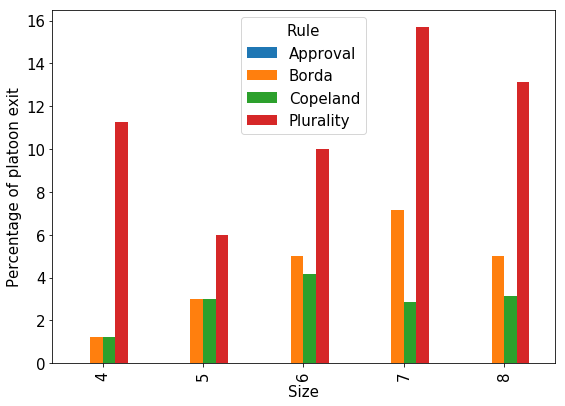

In [315]:
fig = figure( figsize=(9,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('Percentage of platoon exit')
adf_pivot_u.plot.bar(ax=ax)
plt.savefig('ExitPercentageUnstable.png',bbox_inches="tight")

In [241]:
audf = pd.read_csv(r'utilities.csv')

unstables = audf[(audf.Scenario=='Unstable')]  # filter rows
unstables = stables.assign(qname = str(stables.Agent) + '.' + str(stables.Iteration))  # add qname column
unstables[['Rule', 'Difference', 'PlatoonSize','qname']].iloc[80:90]  # print an excerpt of the result

stables = audf[(audf.Scenario=='Stable')]  # filter rows
stables = stables.assign(qname = str(stables.Agent) + '.' + str(stables.Iteration))  # add qname column

<Figure size 432x288 with 0 Axes>

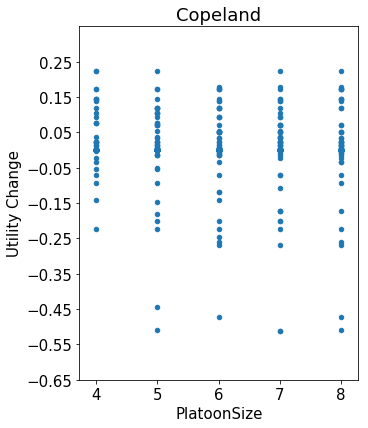

In [297]:
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
unstables[unstables.Rule=="Copeland"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Copeland')
plt.savefig('Dispersions/DispersionUnstableCopeland.png',bbox_inches="tight")

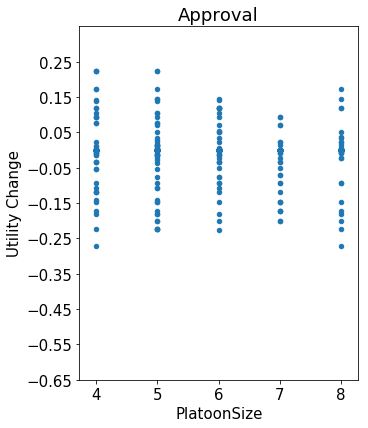

In [298]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
unstables[unstables.Rule=="Approval"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Approval')
plt.savefig('Dispersions/DispersionUnstableApproval.png',bbox_inches="tight")

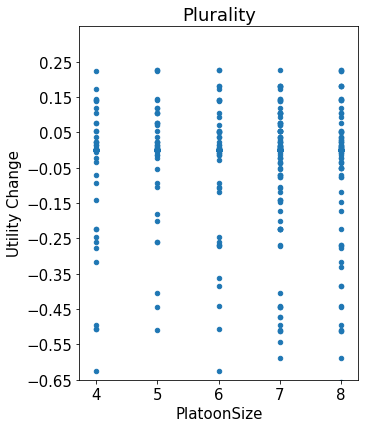

In [299]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
unstables[unstables.Rule=="Plurality"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Plurality')
plt.savefig('Dispersions/DispersionUnstablePlurality.png',bbox_inches="tight")

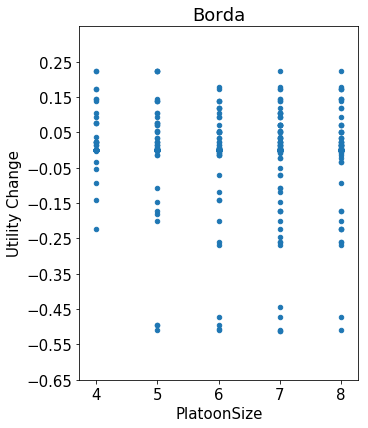

In [300]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
unstables[unstables.Rule=="Borda"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Borda')
plt.savefig('Dispersions/DispersionUnstableBorda.png',bbox_inches="tight")

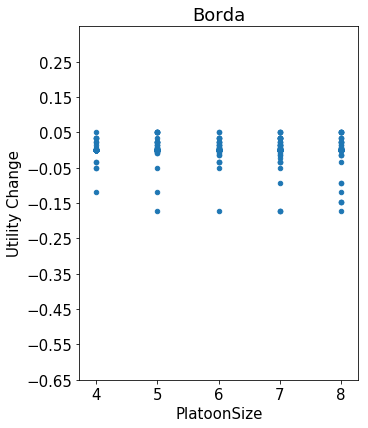

In [301]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
stables[stables.Rule=="Borda"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylim(-0.65,0.35)
ax.set_ylabel('Utility Change')
plt.suptitle('')
plt.title('Borda')
plt.savefig('Dispersions/DispersionStableBorda.png',bbox_inches="tight")

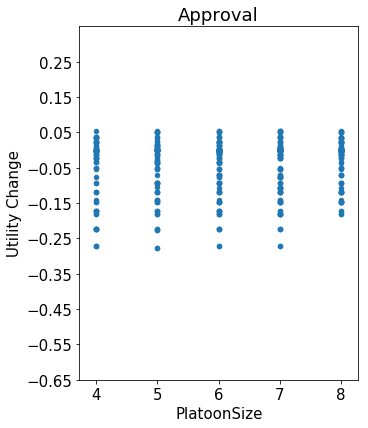

In [302]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
stables[stables.Rule=="Approval"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Approval')
plt.savefig('Dispersions/DispersionStableApproval.png',bbox_inches="tight")

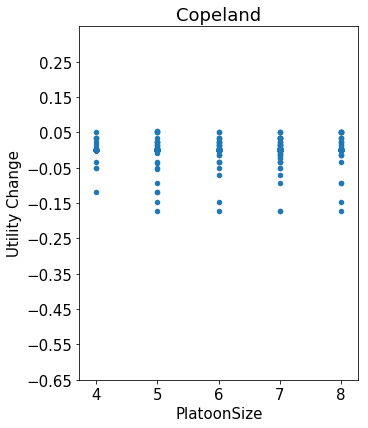

In [303]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
stables[stables.Rule=="Copeland"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Copeland')
plt.savefig('Dispersions/DispersionStableCopeland.png',bbox_inches="tight")

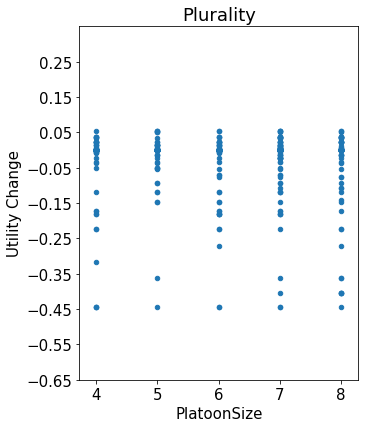

In [304]:
fig = figure( figsize=(5,6.5) )
ax  = fig.add_subplot(111)
ax.set_ylabel('ms')
ax.set_xticks(numpy.arange(0, 10, 1))
ax.set_yticks(numpy.arange(-0.65, 0.33, 0.1))

#stables[stables.Rule=="Copeland"].boxplot(ax=ax, column=['Difference'], by='PlatoonSize', showfliers=False)
stables[stables.Rule=="Plurality"].plot.scatter(x='PlatoonSize', y='Difference',ax=ax )
ax.set_ylabel('Utility Change')
ax.set_ylim(-0.65,0.35)
plt.suptitle('')
plt.title('Plurality')
plt.savefig('Dispersions/DispersionStablePlurality.png',bbox_inches="tight")